In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
consumption_df = pd.read_csv("./data/measurements.csv")

In [3]:
consumption_df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
consumption_df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

- E10 is sold for 1,38€ per liter. 
- SP98 is sold for 1,46€ per liter.
- From my feeling i would say that my car consumes a lot more with E10. 

### Correct the data types

In [5]:
consumption_df["distance"] = consumption_df["distance"].str.replace(",", ".", regex=False).astype('float64')
consumption_df["consume"] = consumption_df["consume"].str.replace(",", ".", regex=False).astype('float64')
consumption_df["temp_inside"] = consumption_df["temp_inside"].str.replace(",", ".", regex=False).astype('float64')
consumption_df["refill liters"] = consumption_df["refill liters"].str.replace(",", ".", regex=False).astype('float64')

In [6]:
# when specials = snow, it has a 1 in the rain column, that could be improved.
consumption_df["specials"] = consumption_df["specials"].str.lower()

In [7]:
consumption_df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


#### Consume is in L/100km so it will be changed to L

In [8]:
consumption_df["consumed_liters"] = consumption_df["consume"]*consumption_df["distance"]/100

### Separe the two fuels

In [9]:
E10_consumption = consumption_df[consumption_df["gas_type"] == "E10"]
SP98_consumption = consumption_df[consumption_df["gas_type"] == "SP98"]

In [10]:
E10_consumption.drop(columns=["gas_type"], inplace=True)
SP98_consumption.drop(columns=["gas_type"], inplace=True);

C:\Users\Marc\AppData\Local\Temp\ipykernel_29520\1342105111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E10_consumption.drop(columns=["gas_type"], inplace=True)
C:\Users\Marc\AppData\Local\Temp\ipykernel_29520\1342105111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP98_consumption.drop(columns=["gas_type"], inplace=True);


### E10

In [11]:
E10_total_distance = E10_consumption["distance"].sum()
E10_total_distance

3375.4

In [12]:
E10_total_consumption = E10_consumption["consumed_liters"].sum()
E10_total_consumption

161.4292

In [13]:
E10_total_price = E10_total_consumption * 1.38
E10_total_price

222.77229599999998

In [14]:
# km per liter
E10_total_distance/E10_total_consumption

20.909476104694814

In [15]:
# km per €
E10_total_distance/E10_total_price

15.15179427876436

### SP98

In [16]:
SP98_total_distance = SP98_consumption["distance"].sum()
SP98_total_distance

4249.9

In [17]:
SP98_total_consumption = SP98_consumption["consumed_liters"].sum()
SP98_total_consumption

201.465

In [18]:
SP98_total_price = SP98_total_consumption * 1.46
SP98_total_price

294.1389

In [19]:
# km per liter
SP98_total_distance/SP98_total_consumption

21.094979276797456

In [20]:
# km per €
SP98_total_distance/SP98_total_price

14.448615943011959

### Conclusions

In [31]:
((E10_total_distance/E10_total_price) / (SP98_total_distance/SP98_total_price) - 1) * 100

4.866752210217706

    "I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already."

With the data we have available we can draw the conclusion that E10 fuel lets you travel more distance for each € spent.
However the increase of km / € spent for E10 over SP98 is only of the 4,87%.

These conclusions have been drawn without taking into account the differences in the environmental conditions under which the different fuels have been used.

For example SP98 fuel was used in winter (lower environmentaltemperature), had more rain, was used in shorter trips with lower mean speed.
All of those factors contribute to a lower performance ratio so this dataset is biased against SP98 fuel.

In [22]:
E10_consumption.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,consumed_liters
count,160.000000,160.000000,160.000000,157.000000,160.000000,160.000000,160.000000,160.000000,5.000000,160.000000
mean,21.096250,4.931250,43.506250,21.917197,10.118750,0.043750,0.100000,0.075000,39.600000,1.008933
std,20.307234,0.900956,14.077949,0.659854,6.392185,0.205181,0.300942,0.264218,3.056959,0.956864
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000,37.700000,0.120000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000,38.000000,0.576250
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000,38.300000,0.693700
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000,39.000000,1.042200
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000,45.000000,5.993800


In [23]:
SP98_consumption.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,consumed_liters
count,228.000000,228.000000,228.000000,219.000000,228.000000,228.000000,228.000000,228.000000,8.000000,228.000000
mean,18.639912,4.899123,40.820175,21.938356,12.228070,0.100877,0.140351,0.087719,35.562500,0.883618
std,24.179598,1.118408,13.170122,1.201906,7.271373,0.301829,0.348115,0.283509,10.672787,1.214646
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000,10.000000,0.124000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000,37.150000,0.531000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000,37.650000,0.663200
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000,39.500000,0.837900
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,11.453300


In [24]:
E10_consumption.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,consumed_liters
distance,1.000000,-0.172572,0.633082,0.160421,0.158903,0.045776,-0.073315,0.027364,0.169619,0.992870
consume,-0.172572,1.000000,-0.233318,-0.070185,-0.322918,0.043591,0.248199,-0.160503,0.306373,-0.090743
speed,0.633082,-0.233318,1.000000,0.034912,0.091093,0.125102,-0.001633,0.128376,-0.458402,0.629556
temp_inside,0.160421,-0.070185,0.034912,1.000000,0.417116,0.308706,0.058411,0.338053,-0.283444,0.148253
temp_outside,0.158903,-0.322918,0.091093,0.417116,1.000000,0.048762,-0.097756,0.236743,0.101134,0.106319
AC,0.045776,0.043591,0.125102,0.308706,0.048762,1.000000,0.336123,0.171118,NaN,0.056287
rain,-0.073315,0.248199,-0.001633,0.058411,-0.097756,0.336123,1.000000,-0.094916,-0.292587,-0.046812
sun,0.027364,-0.160503,0.128376,0.338053,0.236743,0.171118,-0.094916,1.000000,NaN,0.009011
refill liters,0.169619,0.306373,-0.458402,-0.283444,0.101134,NaN,-0.292587,NaN,1.000000,0.231409
consumed_liters,0.992870,-0.090743,0.629556,0.148253,0.106319,0.056287,-0.046812,0.009011,0.231409,1.000000


In [25]:
SP98_consumption.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,consumed_liters
distance,1.000000,-0.109841,0.521258,0.049881,0.065534,-0.046792,0.012206,0.112846,0.173191,0.992357
consume,-0.109841,1.000000,-0.232245,-0.192928,-0.322177,0.120324,0.250377,-0.176202,0.009261,-0.036406
speed,0.521258,-0.232245,1.000000,0.075987,-0.009368,-0.102913,0.026668,0.053796,0.301008,0.512456
temp_inside,0.049881,-0.192928,0.075987,1.000000,0.355781,0.297066,-0.071976,0.221183,0.065833,0.037905
temp_outside,0.065534,-0.322177,-0.009368,0.355781,1.000000,0.200230,-0.251129,0.411229,-0.162812,0.017869
AC,-0.046792,0.120324,-0.102913,0.297066,0.200230,1.000000,0.200071,0.050578,NaN,-0.038979
rain,0.012206,0.250377,0.026668,-0.071976,-0.251129,0.200071,1.000000,-0.125294,-0.581920,0.040818
sun,0.112846,-0.176202,0.053796,0.221183,0.411229,0.050578,-0.125294,1.000000,NaN,0.095053
refill liters,0.173191,0.009261,0.301008,0.065833,-0.162812,NaN,-0.581920,NaN,1.000000,0.198925
consumed_liters,0.992357,-0.036406,0.512456,0.037905,0.017869,-0.038979,0.040818,0.095053,0.198925,1.000000


(0.0, 50.0)

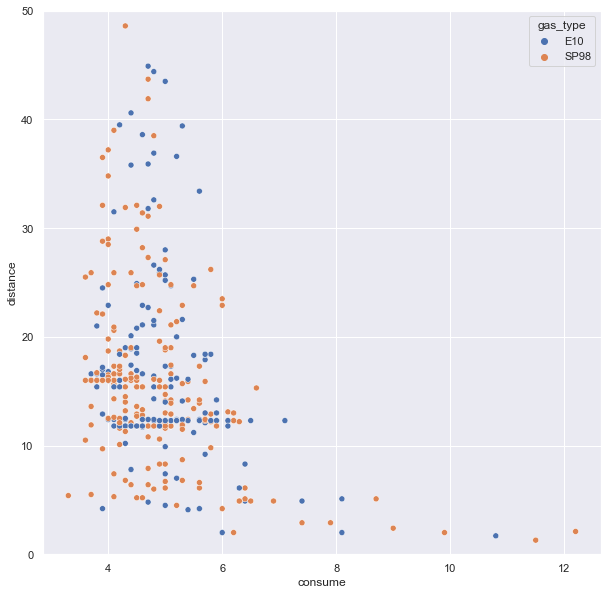

In [26]:
sns.set(rc={"figure.figsize":(10,10)})
fig = sns.scatterplot(data=consumption_df, x="consume", y ="distance", hue="gas_type")
fig.set_ylim(0, 50)


### Considering only sunny days

In [36]:
sunny_consumption = consumption_df[consumption_df["sun"] == 1]

In [38]:
sunny_E10_total_distance = sunny_consumption[sunny_consumption["gas_type"] == "E10"]["distance"].sum()
sunny_E10_total_consumption = sunny_consumption[sunny_consumption["gas_type"] == "E10"]["consumed_liters"].sum()
sunny_E10_total_price = sunny_E10_total_consumption * 1.38
# km per €
sunny_E10_total_distance/sunny_E10_total_price

16.06832075645819

In [39]:
sunny_SP98_total_distance = sunny_consumption[sunny_consumption["gas_type"] == "SP98"]["distance"].sum()
sunny_SP98_total_consumption = sunny_consumption[sunny_consumption["gas_type"] == "SP98"]["consumed_liters"].sum()
sunny_SP98_total_price = sunny_SP98_total_consumption * 1.46
# km per €
sunny_SP98_total_distance/sunny_SP98_total_price

14.963188754841692

#### Conclusions for sunny days

On sunny days E10 fuel still is the better option since it has a better distance/€ spent ratio.

### Considering only rainy days

In [42]:
rain_consumption = consumption_df[consumption_df["rain"] == 1]

In [47]:
rain_E10_total_distance = rain_consumption[rain_consumption["gas_type"] == "E10"]["distance"].sum()
rain_E10_total_consumption = rain_consumption[rain_consumption["gas_type"] == "E10"]["consumed_liters"].sum()
rain_E10_total_price = rain_E10_total_consumption * 1.38
# km per €
E10_rain_distance_price_ratio = rain_E10_total_distance/rain_E10_total_price
E10_rain_distance_price_ratio

13.784037721988744

In [48]:
rain_SP98_total_distance = rain_consumption[rain_consumption["gas_type"] == "SP98"]["distance"].sum()
rain_SP98_total_consumption = rain_consumption[rain_consumption["gas_type"] == "SP98"]["consumed_liters"].sum()
rain_SP98_total_price = rain_SP98_total_consumption * 1.46
# km per €
SP98_rain_distance_price_ratio = rain_SP98_total_distance/rain_SP98_total_price
SP98_rain_distance_price_ratio

13.186447905807828

#### Conclusions for rainy days

On rainy days E10 fuel still is the better option since it has a better distance/€ spent ratio.